In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras

In [24]:
print(tensorflow.test.is_built_with_cuda())
print(tensorflow.test.gpu_device_name())

True
/device:GPU:0


In [25]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [26]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
print(y_train.shape, y_test.shape)

(50000,) (10000,)


In [27]:
pd.Series(y_train).value_counts().sort_index()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: count, dtype: int64

In [28]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

[40288  8244   593 38668 11352 46617 35323  2323 20394 31179 12377 44977
 22333 32617 27040 49978]


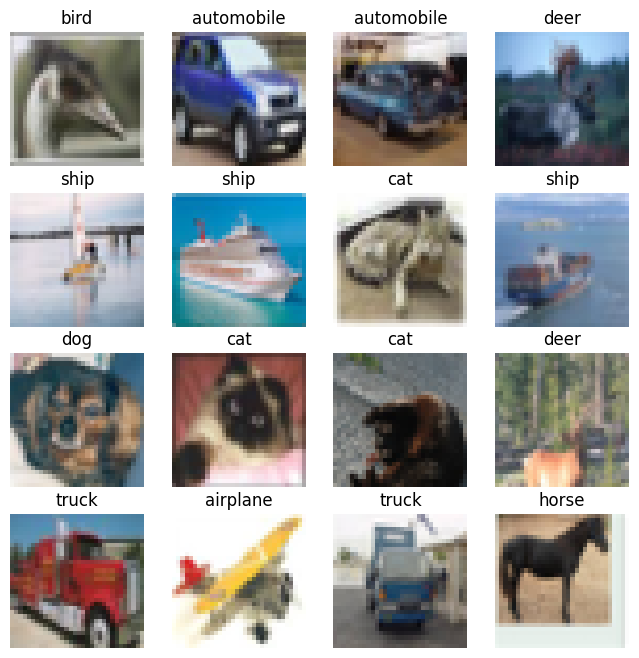

In [29]:
samples = np.random.randint(50000, size = 16)
print(samples)

plt.figure(figsize = (8, 8))    # size는 inch
for i, idx in enumerate(samples):
    plt.subplot(4, 4, i+1)      # matplotlib의 첫번째는 1
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_names[y_train[idx]])
plt.show()

### Split Validation Data

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (10000, 32, 32, 3)
(40000,) (10000,) (10000,)


### Normalization

In [31]:
X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

print(np.max(X_train_s), np.min(X_train_s))

1.0 0.0


In [32]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

y_train_o[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Model

In [33]:
from keras import layers

model = keras.Sequential([
    layers.Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
    layers.MaxPooling2D(pool_size = (2,2)),
    
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D(pool_size = (2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax")
    
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [35]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [36]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    verbose = 1
)

Epoch 1/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5485 - accuracy: 0.4457 - val_loss: 1.3069 - val_accuracy: 0.5338
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2228 - accuracy: 0.5674 - val_loss: 1.1667 - val_accuracy: 0.5908
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0884 - accuracy: 0.6183 - val_loss: 1.0700 - val_accuracy: 0.6277
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0101 - accuracy: 0.6464 - val_loss: 1.0146 - val_accuracy: 0.6472
Epoch 5/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9465 - accuracy: 0.6679 - val_loss: 1.0374 - val_accuracy: 0.6390
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8952 - accuracy: 0.6874 - val_loss: 0.9924 - val_accuracy: 0.6550
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.8496 - accuracy: 0.7024 - val_loss: 0.9904 - val_accuracy:

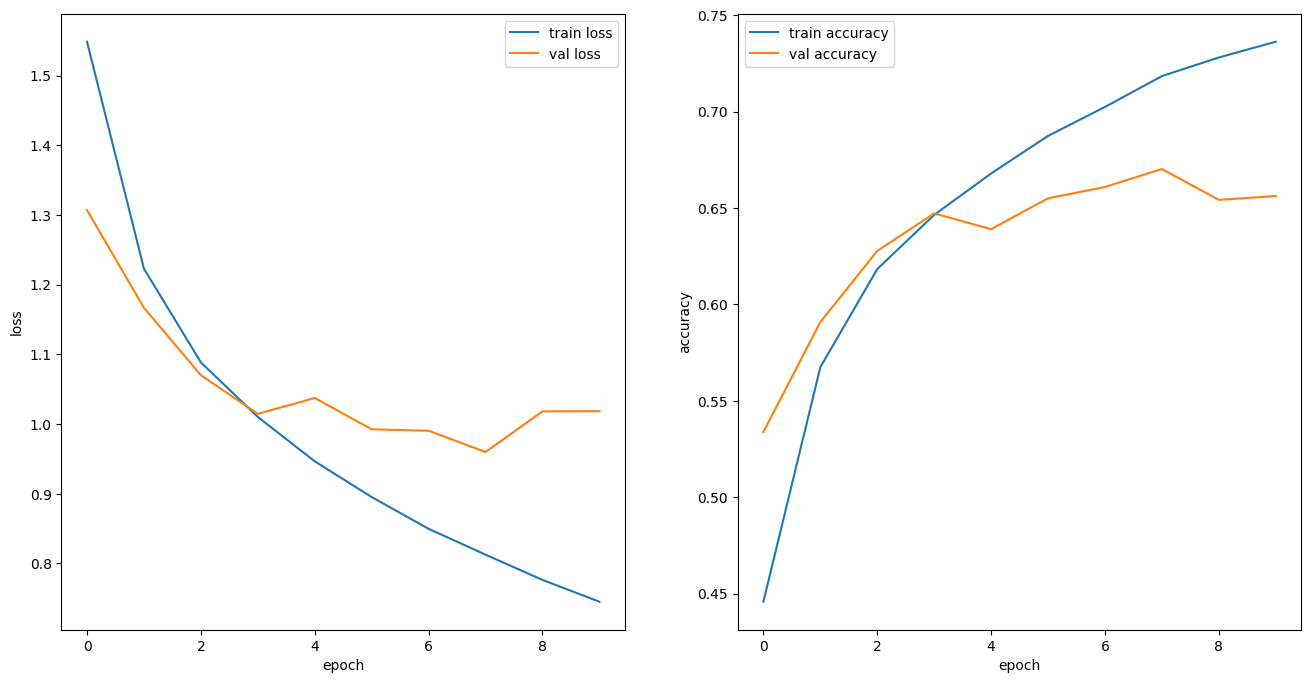

In [37]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize = (16,8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()

    plt.show()

plot_history(history)

### Dropout Layer

In [38]:
def create_model_01():
    from keras import layers

    model = keras.Sequential([
        layers.Conv2D(filters = 16, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Dropout(0.3),         # dropout
        
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"),
        layers.MaxPooling2D(pool_size = (2,2)),
        layers.Dropout(0.3),         # dropout
        
        layers.Flatten(),
        layers.Dense(64, activation = "relu"),
        layers.Dense(10, activation = "softmax")
        
    ])
    
    return model

In [39]:
model = create_model_01()
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    verbose = 1
)

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6336 - accuracy: 0.4035 - val_loss: 1.3628 - val_accuracy: 0.5125
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3598 - accuracy: 0.5150 - val_loss: 1.2411 - val_accuracy: 0.5695
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.2541 - accuracy: 0.5544 - val_loss: 1.1518 - val_accuracy: 0.5993
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1854 - accuracy: 0.5796 - val_loss: 1.2053 - val_accuracy: 0.5786
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1364 - accuracy: 0.5988 - val_loss: 1.0806 - val_accuracy: 0.6190
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.1032 - accuracy: 0.6113 - val_loss: 1.0380 - val_accuracy: 0.6358
Epoch 7/10
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0700 - accuracy: 0.6230 - val_loss: 1.0480 - val_accuracy:

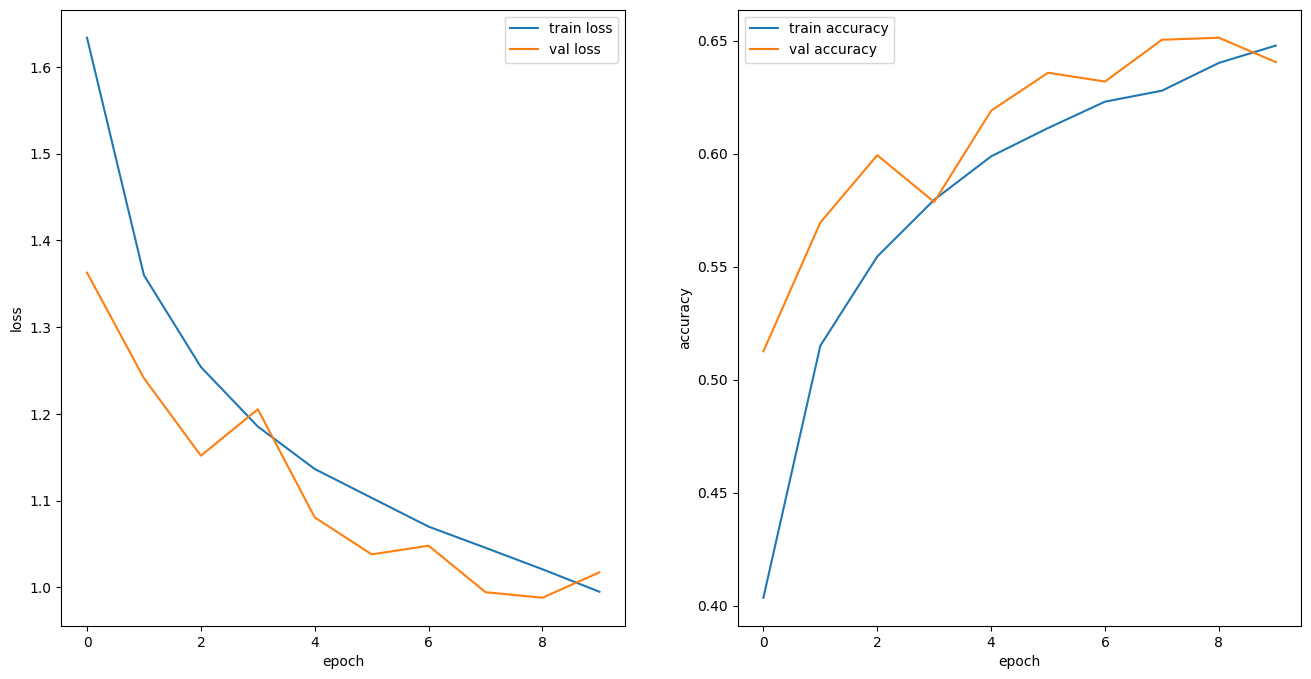

In [40]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize = (16,8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()

    plt.show()

plot_history(history)

### Eval

In [41]:
X_test_s = X_test.astype('float32')/255.
y_test_o = to_categorical(y_test)

model.evaluate(X_test_s, y_test_o)

313/313 [==============================] - 1s 4ms/step - loss: 1.0210 - accuracy: 0.6371


[1.0209934711456299, 0.6370999813079834]

### CallBack
- Early Stopping
- Model Checkpoint
- ReduceLROnPlateau

In [42]:
from keras import callbacks

ckpt_path = './ckpt/cifar10.ckpt'
ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path,
    monitor='val_loss',
    save_weights_only=True,
    save_best_only=True,
    verbose=1
)

earlystopping_callback = callbacks.EarlyStopping(
    monitor = 'val_loss', min_delta = 0, patience = 0, mode = 'auto'
)

reduceLR_callback = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6
)

In [43]:
EPOCHS = 20

model = create_model_01()
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    X_train_s, y_train_o,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val_s, y_val_o),
    callbacks = [ckpt_callback, earlystopping_callback, reduceLR_callback],
    verbose = 1
)

Epoch 1/20
1243/1250 [============================>.] - ETA: 0s - loss: 1.6992 - accuracy: 0.3784
Epoch 1: val_loss improved from inf to 1.45897, saving model to ./ckpt\cifar10.ckpt
1250/1250 [==============================] - 10s 7ms/step - loss: 1.6977 - accuracy: 0.3789 - val_loss: 1.4590 - val_accuracy: 0.4840 - lr: 0.0010
Epoch 2/20
1245/1250 [============================>.] - ETA: 0s - loss: 1.4087 - accuracy: 0.4926
Epoch 2: val_loss improved from 1.45897 to 1.30268, saving model to ./ckpt\cifar10.ckpt
1250/1250 [==============================] - 8s 7ms/step - loss: 1.4087 - accuracy: 0.4927 - val_loss: 1.3027 - val_accuracy: 0.5507 - lr: 0.0010


In [44]:
model.load_weights(ckpt_path)